Support vector machine from scratch


The optimal value is -88.61823806508275
The solution for lambda is
[ 0.          0.         68.18686087 88.61823807  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         20.43137719  0.          0.          0.
  0.          0.        ]
A dual solution corresponding to the inequality constraints is
0.7303788611017906


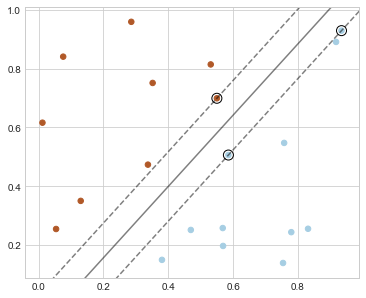

In [24]:
# import packages

import pandas as pd 
import numpy as np
import cvxpy as cp 

# read in data from files

svmdata = pd.read_excel(r'svm.xlsx')

#### part A ####################

# data

X = svmdata.iloc[:,0:2].values
y = svmdata.iloc[:,-1].values

# define SVM quadratic program
# variable definition

l = cp.Variable(len(y), nonneg = True) # lambda variable

# matrix vector combination calculation

matvec = y * (y * np.dot(X, X.T)).T

# problem definition

prob = cp.Problem(cp.Minimize((1/2) * cp.quad_form(l, matvec) - np.ones(len(y)).T @ l),
                [y.T @ l == 0])

prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("The solution for lambda is")
print(l.value)
print("A dual solution corresponding to the inequality constraints is")
print(prob.constraints[0].dual_value)

# recover hyperplane

astar = np.dot(l.value * y, X) # recover astar

bstar = 1/(y[2]) - (np.dot(astar.T, X[2,:])) # recover bstar

xstar = np.zeros([X.shape[0], X.shape[1]])
for i in range(xstar.shape[0]):
    if l.value[i] != 0:
        xstar[i,:] = np.dot(astar, X[i,:].T) + bstar

SV = []
for i in range(X.shape[0]):
    if l.value[i] != 0:
        SV.append(X[i,:])
SV = np.vstack(SV)

def hyperplane(X):
    hyp = np.empty(X.shape[0])
    for i in range(X.shape[0]):
        hyp[i] = np.dot(astar, X[i,:]) + bstar
    return(hyp)

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[6,5])
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = hyperplane(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
        linestyles=['--', '-', '--'])
# plot support vectors#
ax.scatter(SV[:, 0], SV[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.savefig('svm.png')
plt.show()